## Chatbot

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
import pandas as pd
import string
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential



In [2]:
import json

# Load the dataset from a JSON file
with open('dataset2.json') as f:
    data = json.load(f)


stop_words = set()

with open('stopword_id.txt', 'r', encoding='utf-8') as file:
    for line in file:
        stop_words.add(line.strip())


tags = []
inputs = []
responses = {}
lemmatizer = WordNetLemmatizer()
# stemmer = PorterStemmer()

for intent in data['intents']:
    responses[intent['tag']] = intent['responses']
    for line in intent['patterns']:
        # Tokenize each word in the pattern
        w = nltk.word_tokenize(line)
        w = [lemmatizer.lemmatize(word.lower()) for word in w if word not in stop_words]
        inputs.append(' '.join(w))
        tags.append(intent['tag'])

# Create a DataFrame
data_df = pd.DataFrame({"inputs": inputs, "tags": tags})


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Tokenizer
tokenizer = Tokenizer(num_words=2000, oov_token='<OOV>')
tokenizer.fit_on_texts(data_df['inputs'])

# Encode the outputs
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(data_df['tags'])

# Define input shape
input_shape = 100  # Misalkan panjang maksimum input adalah 100 kata

# Padding sequences
sequences = tokenizer.texts_to_sequences(data_df['inputs'])
x_train = pad_sequences(sequences, maxlen=input_shape, truncating='post')

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [4]:
model = Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index)+1, 64, input_length=100),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [5]:
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/200
8/8 [==============================] - 6s 238ms/step - loss: 4.7492 - accuracy: 0.0042 - val_loss: 4.7164 - val_accuracy: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 1s 88ms/step - loss: 4.6943 - accuracy: 0.0208 - val_loss: 4.7261 - val_accuracy: 0.0000e+00
Epoch 3/200
8/8 [==============================] - 1s 92ms/step - loss: 4.6205 - accuracy: 0.0208 - val_loss: 4.8621 - val_accuracy: 0.0333
Epoch 4/200
8/8 [==============================] - 1s 85ms/step - loss: 4.6073 - accuracy: 0.0208 - val_loss: 4.8846 - val_accuracy: 0.0333
Epoch 5/200
8/8 [==============================] - 1s 86ms/step - loss: 4.5833 - accuracy: 0.0292 - val_loss: 4.8481 - val_accuracy: 0.0000e+00
Epoch 6/200
8/8 [==============================] - 1s 84ms/step - loss: 4.5671 - accuracy: 0.0208 - val_loss: 4.8762 - val_accuracy: 0.0000e+00
Epoch 7/200
8/8 [==============================] - 1s 109ms/step - loss: 4.5481 - accuracy: 0.0208 - val_loss: 4.8830 - val_accuracy: 0.0000e+0

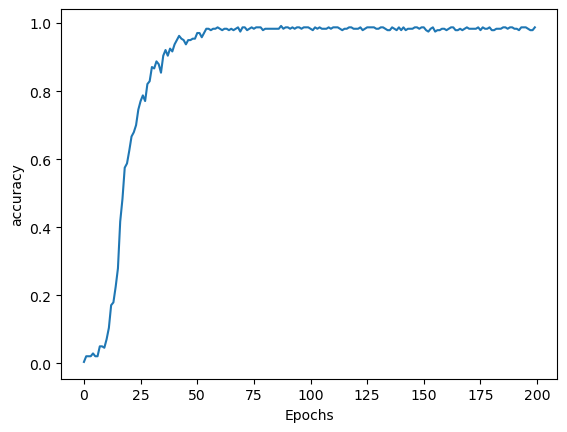

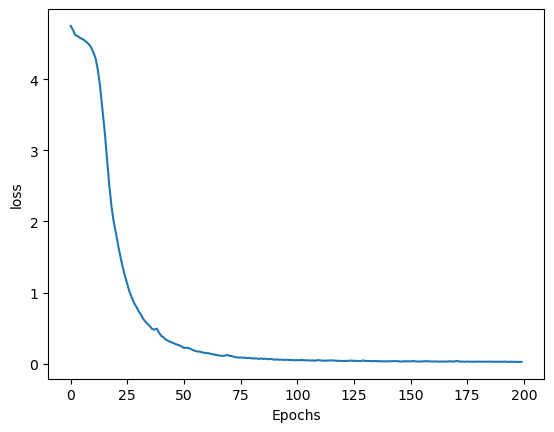

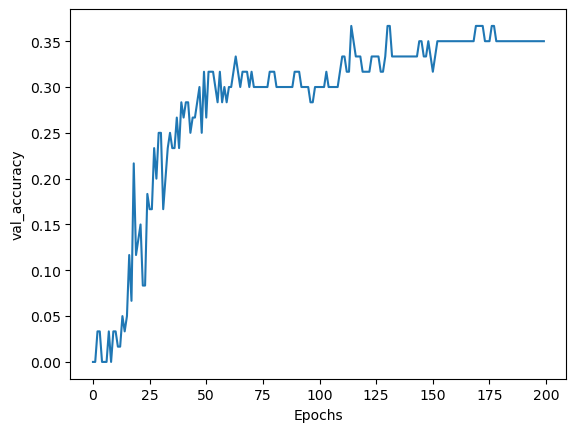

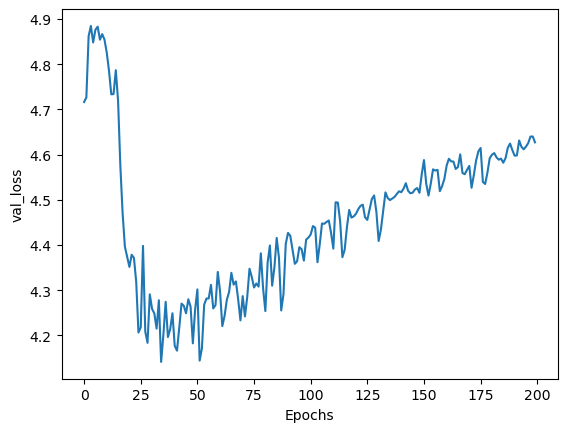

In [6]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plot_graphs(history, "val_accuracy")
plot_graphs(history, "val_loss")

In [ ]:
try:
    user_input = input('Masukkan pertanyaan: ')
    user_input = ''.join([letters.lower() for letters in user_input if letters not in string.punctuation])
    texts_p = [user_input]
    
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = pad_sequences(prediction_input, maxlen=input_shape)
    
    predicted_output = model.predict(prediction_input)
    predicted_label_index = np.argmax(predicted_output)
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]
    
    print('Chatbot:', predicted_label)
except:
    print("Chatbot: Maaf, saya tidak memahami maksud Anda.")

1/1 [==============================] - 1s 1s/step
Chatbot: PMS (Sindrom Pra-Menstruasi)


In [7]:
import random

while True:
    user_input = input('You: ')
    if user_input.lower() == 'goodbye':
        print("Chatbot: Goodbye!")
        break
    try:
        input_seq = tokenizer.texts_to_sequences([user_input])
        input_seq = pad_sequences(input_seq, maxlen=input_shape)
        predicted_label_seq = model.predict(input_seq)
        predicted_label = label_encoder.inverse_transform([predicted_label_seq.argmax(axis=-1)])[0]
        print("tags:", predicted_label)

        # Pilih respons dari kategori tag
        responses_for_tag = responses.get(predicted_label, ["Chatbot: Maaf, saya tidak memahami maksud Anda."])
        response = random.choice(responses_for_tag)
        
        print("Chatbot:", response)
    except:
        print("Chatbot: Maaf, saya tidak memahami maksud Anda.")


1/1 [==============================] - 1s 792ms/step


c:\Users\nurul\anaconda3\envs\cnn\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: menstruasi yang berlebihan
Chatbot: Menorrhagia atau menstruasi berlebihan dapat diatasi dengan beberapa cara, antara lain:

- Mengonsumsi obat anti-inflamasi nonsteroid (OAINS) seperti ibuprofen untuk mengurangi rasa sakit dan jumlah pendarahan
- Mengonsumsi pil KB untuk menyeimbangkan hormon dan mengendalikan darah haid berlebihan
- Mengonsumsi obat penambah hormon progesteron (progestin) untuk menyeimbangkan hormon dan mengurangi perdarahan haid
- Menempatkan bantal pemanas atau botol berisi air panas di perut untuk meredakan kram
- Mengonsumsi makanan yang kaya zat besi untuk mencegah anemia
- Menghindari makanan dan minuman yang dapat memperburuk gejala, seperti alkohol, kafein, dan makanan pedas
- Berolahraga secara teratur untuk meningkatkan sirkulasi darah dan meredakan stres
- Jika menstruasi berlebihan disebabkan oleh kondisi medis tertentu, seperti fibroid atau polip rahim, dokter mungkin akan merekomendasikan prosedur medis seperti kuretase atau histerektomi
1/1 [====

c:\Users\nurul\anaconda3\envs\cnn\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: pola makan PMS
Chatbot: Beberapa makanan yang dapat membantu mengatasi gejala PMS antara lain: 

1. Sayuran berdaun hijau seperti bayam, kangkung, dan lobak kaya akan magnesium yang dapat membantu mengatur keseimbangan hormon perempuan .
2. Kacang-kacangan seperti kacang almond, kacang mete, dan kacang hijau mengandung magnesium dan vitamin B6 yang dapat membantu meredakan gejala PMS  .
3. Buah-buahan seperti pisang, apel, dan stroberi mengandung vitamin C yang dapat membantu mengurangi stres .
4. Ikan salmon mengandung lemak omega-3 dan vitamin D yang dapat membantu meredakan kram dan nyeri saat menstruasi .
5. Yogurt mengandung kalsium yang dapat membantu menurunkan risiko PMS sebanyak 40% .
6. Makanan tinggi serat seperti gandum utuh dan biji-bijian dapat membantu menjaga kadar gula darah tetap seimbang dan meningkatkan hormon serotonin .

Pastikan untuk selalu menjaga pola makan sehat dan bergizi lengkap setiap hari. Perhatikan komposisi asupan di setiap sesi makan dan hindar

c:\Users\nurul\anaconda3\envs\cnn\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: menopause
Chatbot: Menopause adalah kondisi di mana ovarium berhenti memproduksi hormon reproduksi dan menstruasi tidak terjadi selama 12 bulan berturut-turut. Gejala umum dari menopause meliputi haid yang tidak teratur, hot flashes, insomnia, dan perubahan suasana hati.
1/1 [==============================] - 0s 72ms/step


c:\Users\nurul\anaconda3\envs\cnn\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: tips menopause
Chatbot: Beberapa cara untuk mengatasi gejala menopause meliputi olahraga teratur, makan makanan sehat, dan menghindari rokok dan alkohol. Jika gejala menopause mengganggu aktivitas sehari-hari Anda, sebaiknya berkonsultasi dengan dokter Anda untuk mendapatkan saran lebih lanjut.
1/1 [==============================] - 0s 45ms/step


c:\Users\nurul\anaconda3\envs\cnn\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: menopause
Chatbot: Menopause adalah kondisi di mana ovarium berhenti memproduksi hormon reproduksi dan menstruasi tidak terjadi selama 12 bulan berturut-turut. Gejala umum dari menopause meliputi haid yang tidak teratur, hot flashes, insomnia, dan perubahan suasana hati.
1/1 [==============================] - 0s 47ms/step


c:\Users\nurul\anaconda3\envs\cnn\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: menstruasi yang berlebihan
Chatbot: Menorrhagia atau menstruasi berlebihan dapat diatasi dengan beberapa cara, antara lain:

- Mengonsumsi obat anti-inflamasi nonsteroid (OAINS) seperti ibuprofen untuk mengurangi rasa sakit dan jumlah pendarahan
- Mengonsumsi pil KB untuk menyeimbangkan hormon dan mengendalikan darah haid berlebihan
- Mengonsumsi obat penambah hormon progesteron (progestin) untuk menyeimbangkan hormon dan mengurangi perdarahan haid
- Menempatkan bantal pemanas atau botol berisi air panas di perut untuk meredakan kram
- Mengonsumsi makanan yang kaya zat besi untuk mencegah anemia
- Menghindari makanan dan minuman yang dapat memperburuk gejala, seperti alkohol, kafein, dan makanan pedas
- Berolahraga secara teratur untuk meningkatkan sirkulasi darah dan meredakan stres
- Jika menstruasi berlebihan disebabkan oleh kondisi medis tertentu, seperti fibroid atau polip rahim, dokter mungkin akan merekomendasikan prosedur medis seperti kuretase atau histerektomi
1/1 [====

c:\Users\nurul\anaconda3\envs\cnn\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: menopause
Chatbot: Menopause adalah kondisi di mana ovarium berhenti memproduksi hormon reproduksi dan menstruasi tidak terjadi selama 12 bulan berturut-turut. Gejala umum dari menopause meliputi haid yang tidak teratur, hot flashes, insomnia, dan perubahan suasana hati.


In [8]:
def predict_answer(model, tokenizer, label_encoder, question):
    question = ''.join([letters.lower() for letters in question if letters not in string.punctuation])
    texts_p = [question]
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], input_shape)
    output = model.predict(prediction_input)
    output = output.argmax()
    response_tag = label_encoder.inverse_transform([output])[0]
    return response_tag

In [9]:
import random
while True:
    
    user_input = input('You: ')
    if user_input.lower() == 'goodbye':
        print("Chatbot: Goodbye!")
        break

    # Use your predict_answer function to get the response
    response_tag = predict_answer(model, tokenizer, label_encoder, user_input)

    print("Chatbot:", random.choice(responses.get(response_tag, ["I'm sorry, I don't understand that."])))

1/1 [==============================] - 0s 325ms/step
Chatbot: Menstruasi adalah proses alami yang terjadi pada wanita setiap bulan. Selama menstruasi, tubuh melepaskan lapisan rahim yang tidak diperlukan melalui vagina.
1/1 [==============================] - 0s 17ms/step
Chatbot: Menstruasi adalah proses alami yang terjadi pada wanita setiap bulan. Selama menstruasi, tubuh melepaskan lapisan rahim yang tidak diperlukan melalui vagina.
1/1 [==============================] - 0s 16ms/step
Chatbot: Menstrual cup adalah alat penampung darah menstruasi yang dapat digunakan berulang kali. Berikut adalah panduan penggunaan menstrual cup: 

1. Cuci tangan dengan sabun dan air mengalir. 
2. Oleskan air atau pelumas berbahan dasar air ke tepi gelas. 
3. Lipat dengan kuat cangkir menstruasi menjadi dua, pegang di satu tangan dengan tepi menghadap ke atas. 
4. Masukkan cangkir, pelek ke atas, ke dalam vagina seperti Anda akan memasukkan tampon tanpa aplikator. 
5. Setelah cangkir berada di dalam va